In [1]:
import numpy as np
from matplotlib import pyplot as plt

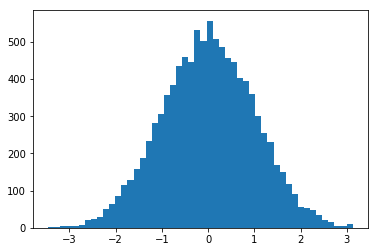

In [2]:
# Use uniform to sample from Gaussian
def sampleOneFromGaussian():return np.sum(np.random.uniform(size=(12)))-6
def sampleNFromGaussian(N): return np.array([sampleOneFromGaussian() for i in range(N)])
ar=sampleNFromGaussian(10000)
hist=plt.hist(ar,bins=50)

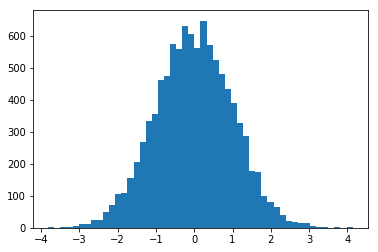

In [3]:
# using built-in function in numpy
def sampleGaussian(M,S,numPoints=10000):
    return np.random.randn(numPoints)*np.sqrt(S)+M
ar=sampleGaussian(0,1)
hist=plt.hist(ar,bins=50)

In [4]:
from lib.bayesian1Dmd import *

In [5]:
MM=2
# upper bound Gaussian
Mu1,S1=1,6
# Mixture parameters
Mu21,S21=-3,3
Mu22,S22=2,1

numPoints=10000000

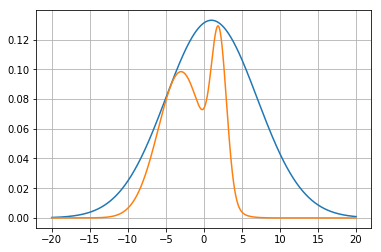

In [6]:
dist1=Normal(-20,20,0.001,M=Mu1,S=S1)
dist2=GMixtureM(-20,20,0.001)
dist2.addGausian(M=Mu21,S=S21,weight=0.74)
dist2.addGausian(M=Mu22,S=S22,weight=0.26)
plt.plot(dist1.domain,dist1.getDist()*MM)
plt.plot(dist2.domain,dist2.getDist())
plt.grid()

In [7]:
samplesG=sampleGaussian(M=Mu1,S=S1,numPoints=numPoints)
p1=dist1.getDensities(samplesG)
p2=dist2.getDensities(samplesG)
props=np.random.uniform(0,1,size=numPoints)
keep_probs=p2/(MM*p1)
kept_points=(keep_probs>=props)
pointsMixture=samplesG[kept_points]


In [ ]:
hist1,hist2=plt.hist(samplesG,bins=50000),plt.hist(pointsMixture,bins=50)